In [100]:
#This program will obtain yahoo finance data using an API for a group of banks, and will work to visualize 
#trends/datasets/information in a variety of ways

#Libraries including pandas, matplotlib, seaborn, and yfinance are all used 

In [2]:

import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf
yf.pdr_override()
%matplotlib inline

#Import needed libraries and set matplotlib to inline to see visuals in jupyter notebook

In [4]:
#Obtaining stock data from Jan 1 2006 - Jan 1 2016 for the known banks:
#Using yahoo finance (above)

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [27]:
# Bank of America
BAC = data.get_data_yahoo('BAC', start, end)
 
# CitiGroup
C = data.get_data_yahoo('C', start, end)
 
# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)
 
# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)
 
# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)
 
# Wells Fargo
WFC = data.get_data_yahoo('WFC', start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [73]:
ticker = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [74]:
#Concatenate the banks together and fill column names:

In [75]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [76]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [77]:
bank_stocks.head()
#Presenting the data

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  33.170307  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.818035  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.860302  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.810989  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.832123  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.886620  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.910576  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  35.006294  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  35.042206  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.413151  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.975801  11016400  
2006-01-04   31.530001  19.744108  10870000  
2006-01-05   31.495001  19.722191  10158000  
2006-01-06   31.680000  19.838039   8403800  
2006-01-09   31.674999  19.834906   5619600  

[5 rows x 36 columns]

In [78]:
#using .xs() to retrun cross sections, we can see the max close price for each banks stock within the period

In [79]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [80]:
#Create a new dataframe for returns 

In [81]:
new_returns = pd.DataFrame()

In [101]:
for i in tickers:
    new_returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
new_returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [83]:
#Using the seaborn library we can create a pairplot to represent the returns dataframe:

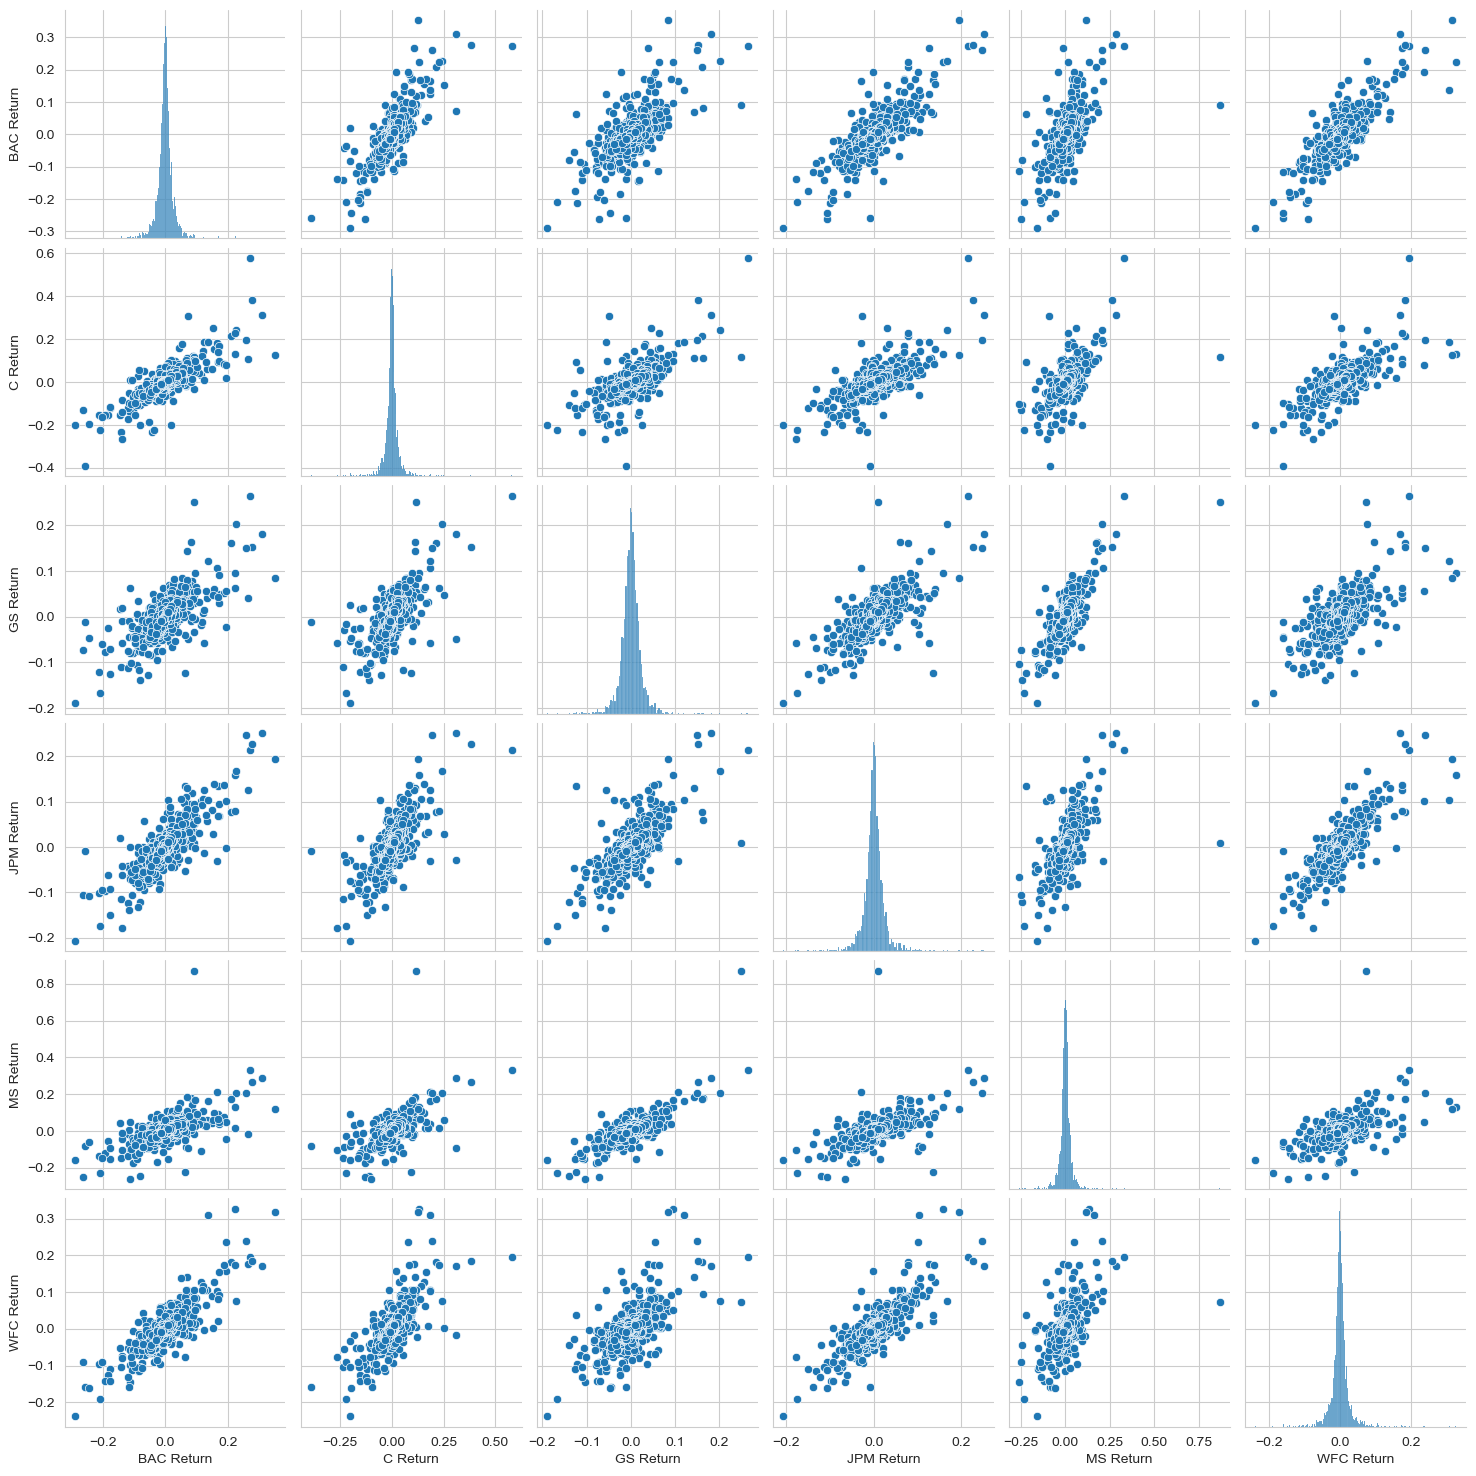

In [84]:
import seaborn as sns
sns.pairplot(new_returns[1:])

In [85]:
new_returns.idxmin()

#Worst day single returns for each bank 

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [86]:
new_returns.idxmax()

#Best day single returns for each bank

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [87]:
#By examining the standard deviation of the returns its noticible that
#Citigroup bank is the riskiest over the entire time period
new_returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [88]:
new_returns.loc['2015-01-01':'2015-12-31'].std()

#In the year 2015, morgan stanley returns were the riskiest 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [89]:
#Create a distplot with seaborn to better visualize this:

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

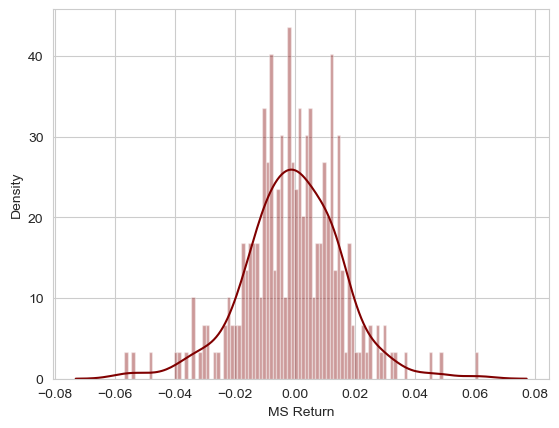

In [90]:
sns.distplot(new_returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='maroon',bins=100)

In [91]:
sns.set_style('whitegrid')

In [92]:
#A line plot to visualize close price for every bank for the period:


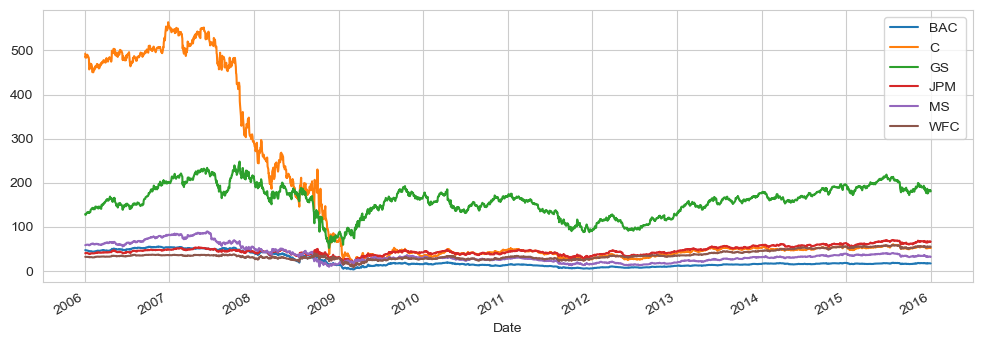

In [102]:
for i in tickers:
    bank_stocks[i]['Close'].plot(figsize=(12,4),label=i)
plt.legend()

In [94]:
#To understand our data, lets plot the 30 day average against close price in order to analyze moving averages for 2008
#for BAC:

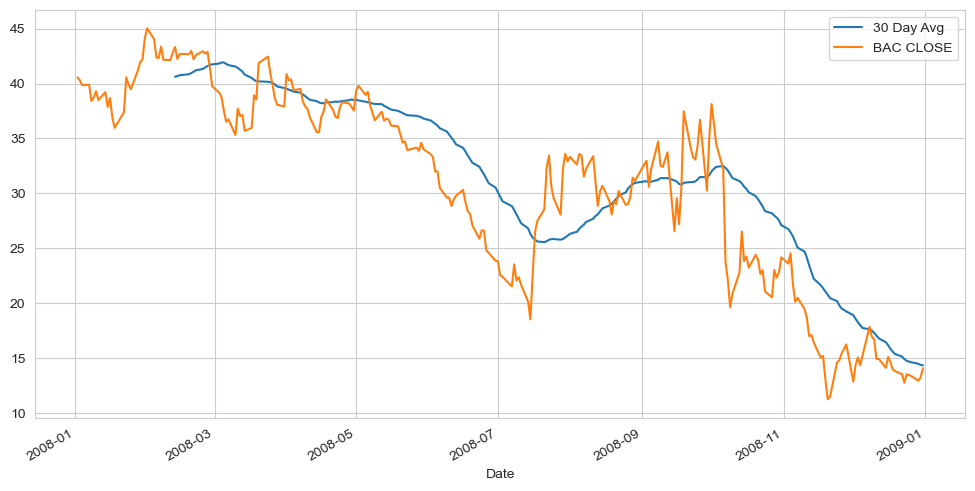

In [95]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [96]:
# We can also create a heatmap to show correlations:

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

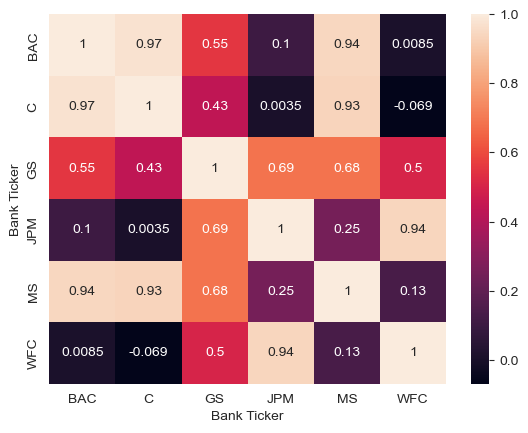

In [97]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [98]:
#Visualizing the correlation with a clustermap:


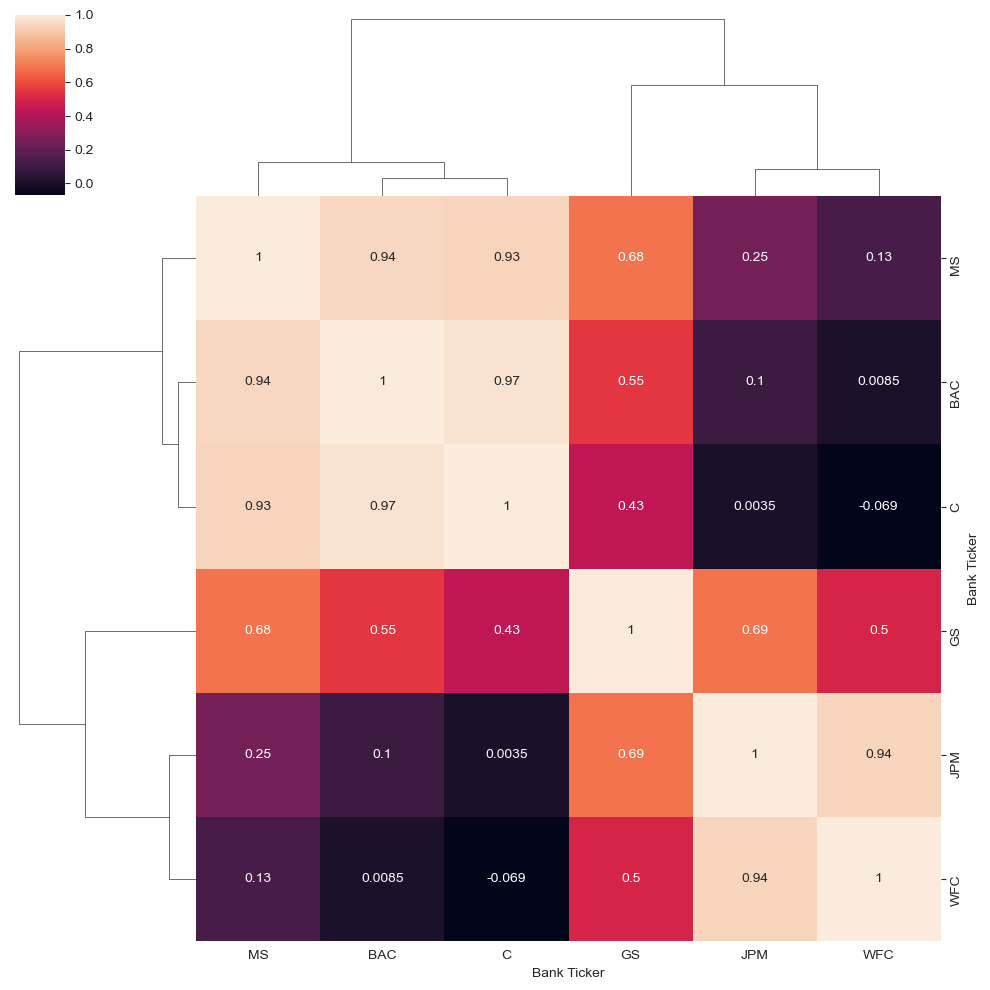

In [99]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)